Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


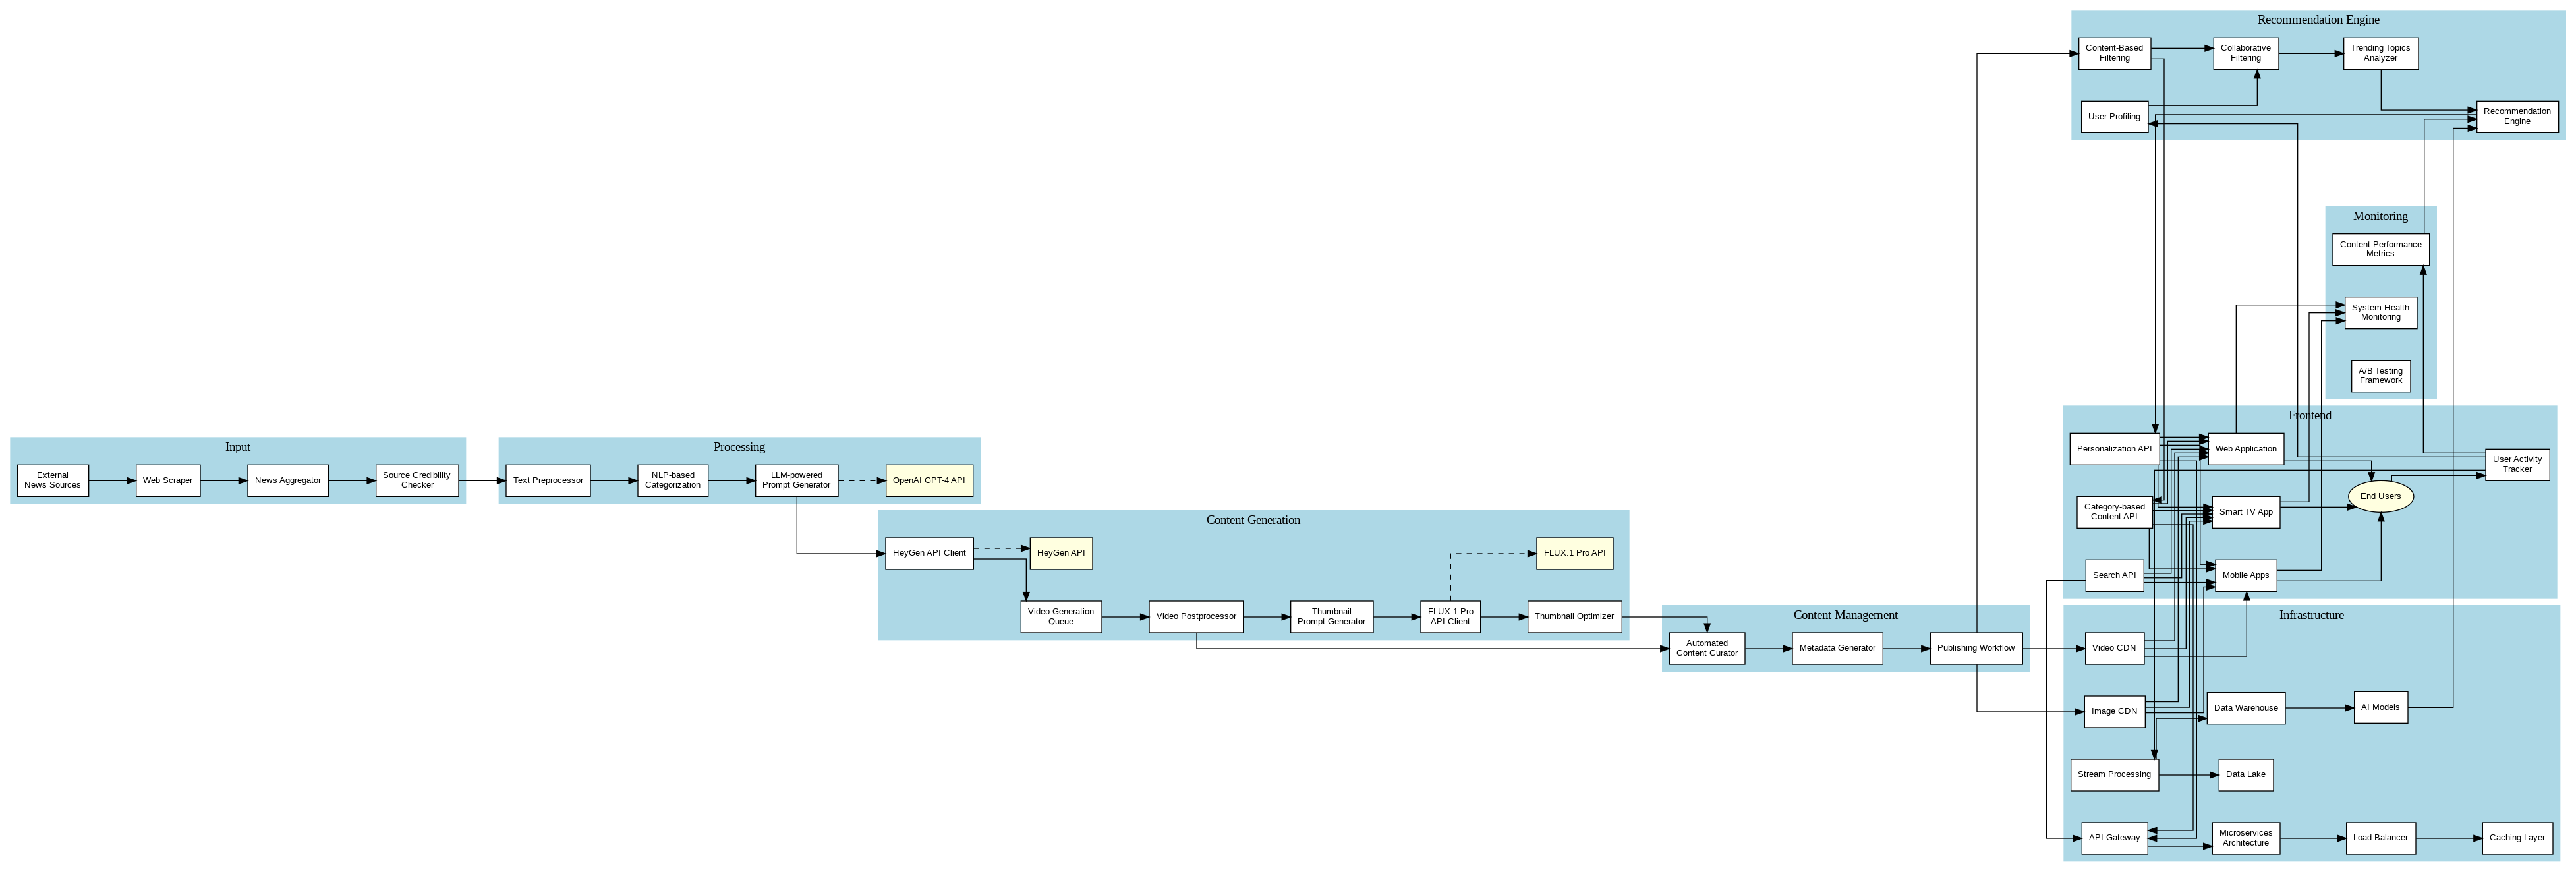

In [7]:
!apt-get install graphviz
!pip install graphviz

from graphviz import Source
from IPython.display import Image

dot_code = """
digraph QwertzAGArchitecture {
    rankdir=LR;
    ranksep=0.75;
    nodesep=0.5;
    splines=ortho;
    node [shape=rectangle, style=filled, fillcolor=lightgray, fontname="Helvetica", fontsize=10];

    subgraph cluster_input {
        label="Input";
        style=filled;
        color=lightblue;
        node [style=filled, fillcolor=white];
        ExternalNewsSources [label="External\nNews Sources"];
        Scraper [label="Web Scraper"];
        Aggregator [label="News Aggregator"];
        CredibilityChecker [label="Source Credibility\nChecker"];
        ExternalNewsSources -> Scraper -> Aggregator -> CredibilityChecker;
    }

    subgraph cluster_processing {
        label="Processing";
        style=filled;
        color=lightblue;
        node [style=filled, fillcolor=white];
        Preprocessor [label="Text Preprocessor"];
        Categorizer [label="NLP-based\nCategorization"];
        PromptGenerator [label="LLM-powered\nPrompt Generator"];
        OpenAIAPI [label="OpenAI GPT-4 API", shape=rectangle, style=filled, fillcolor=lightyellow];
        CredibilityChecker -> Preprocessor -> Categorizer -> PromptGenerator;
        PromptGenerator -> OpenAIAPI [style=dashed];
    }

    subgraph cluster_generation {
        label="Content Generation";
        style=filled;
        color=lightblue;
        node [style=filled, fillcolor=white];
        HeyGenClient [label="HeyGen API Client"];
        VideoQueue [label="Video Generation\nQueue"];
        VideoPostprocessor [label="Video Postprocessor"];
        HeyGenAPI [label="HeyGen API", shape=rectangle, style=filled, fillcolor=lightyellow];
        ThumbnailPromptGenerator [label="Thumbnail\nPrompt Generator"];
        FLUXClient [label="FLUX.1 Pro\nAPI Client"];
        ThumbnailOptimizer [label="Thumbnail Optimizer"];
        FLUXAPI [label="FLUX.1 Pro API", shape=rectangle, style=filled, fillcolor=lightyellow];
        PromptGenerator -> HeyGenClient;
        HeyGenClient -> HeyGenAPI [style=dashed];
        HeyGenClient -> VideoQueue -> VideoPostprocessor;
        VideoPostprocessor -> ThumbnailPromptGenerator -> FLUXClient;
        FLUXClient -> FLUXAPI [style=dashed];
        FLUXClient -> ThumbnailOptimizer;
    }

    subgraph cluster_management {
        label="Content Management";
        style=filled;
        color=lightblue;
        node [style=filled, fillcolor=white];
        ContentCurator [label="Automated\nContent Curator"];
        MetadataGenerator [label="Metadata Generator"];
        PublishingWorkflow [label="Publishing Workflow"];
        VideoPostprocessor -> ContentCurator;
        ThumbnailOptimizer -> ContentCurator;
        ContentCurator -> MetadataGenerator -> PublishingWorkflow;
    }

    subgraph cluster_recommendation {
        label="Recommendation Engine";
        style=filled;
        color=lightblue;
        node [style=filled, fillcolor=white];
        UserProfiling [label="User Profiling"];
        ContentFiltering [label="Content-Based\nFiltering"];
        CollaborativeFiltering [label="Collaborative\nFiltering"];
        TrendingAnalyzer [label="Trending Topics\nAnalyzer"];
        RecommendationEngine [label="Recommendation\nEngine"];
        PublishingWorkflow -> ContentFiltering;
        UserProfiling -> CollaborativeFiltering;
        ContentFiltering -> CollaborativeFiltering -> TrendingAnalyzer -> RecommendationEngine;
    }

    subgraph cluster_frontend {
        label="Frontend";
        style=filled;
        color=lightblue;
        node [style=filled, fillcolor=white];
        ContentAPI [label="Category-based\nContent API"];
        PersonalizationAPI [label="Personalization API"];
        SearchAPI [label="Search API"];
        ActivityTracker [label="User Activity\nTracker"];
        WebApp [label="Web Application"];
        MobileApp [label="Mobile Apps"];
        TVApp [label="Smart TV App"];
        Users [label="End Users", shape=oval, style=filled, fillcolor=lightyellow];
        RecommendationEngine -> PersonalizationAPI;
        ContentFiltering -> ContentAPI;
        {ContentAPI, PersonalizationAPI, SearchAPI} -> {WebApp, MobileApp, TVApp};
        {WebApp, MobileApp, TVApp} -> Users;
        Users -> ActivityTracker -> UserProfiling;
    }

    subgraph cluster_infrastructure {
        label="Infrastructure";
        style=filled;
        color=lightblue;
        node [style=filled, fillcolor=white];
        VideoCDN [label="Video CDN"];
        ImageCDN [label="Image CDN"];
        APIGateway [label="API Gateway"];
        Microservices [label="Microservices\nArchitecture"];
        LoadBalancer [label="Load Balancer"];
        CachingLayer [label="Caching Layer"];
        DataLake [label="Data Lake"];
        DataWarehouse [label="Data Warehouse"];
        StreamProcessing [label="Stream Processing"];
        AIModels [label="AI Models"];
        PublishingWorkflow -> {VideoCDN, ImageCDN};
        {VideoCDN, ImageCDN} -> {WebApp, MobileApp, TVApp};
        {ContentAPI, PersonalizationAPI, SearchAPI} -> APIGateway -> Microservices -> LoadBalancer -> CachingLayer;
        ActivityTracker -> StreamProcessing -> {DataLake, DataWarehouse};
        DataWarehouse -> AIModels -> RecommendationEngine;
    }

    subgraph cluster_monitoring {
        label="Monitoring";
        style=filled;
        color=lightblue;
        node [style=filled, fillcolor=white];
        PerformanceMetrics [label="Content Performance\nMetrics"];
        SystemMonitoring [label="System Health\nMonitoring"];
        ABTesting [label="A/B Testing\nFramework"];
        ActivityTracker -> PerformanceMetrics -> RecommendationEngine;
        {WebApp, MobileApp, TVApp} -> SystemMonitoring;
    }
}
"""

graph = Source(dot_code)
graph.render('qwertz_architecture', format='png', cleanup=True)
Image('qwertz_architecture.png')